In [1]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_host = 'localhost'
db_user = 'root'
db_password = 'root'
db_name = 'telco_churn'

In [3]:
try:
    engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')
    df = pd.read_sql('SELECT * FROM churn_data;', engine)
    print('Data loaded successfully from SQL Database')
except mysql.connector.Error as err:
    print(f"Error connecting to MySQL or loading data: {err}")
finally:
    if 'engine' in locals():
        engine.dispose()

Data loaded successfully from SQL Database


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12M
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25-36M
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12M
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48M
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12M


In [5]:
sns.set_style(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Axes(0.14072,0.11;0.320833x0.77)


Text(0.5, 1.0, 'Overall Customer Churn Distribution')

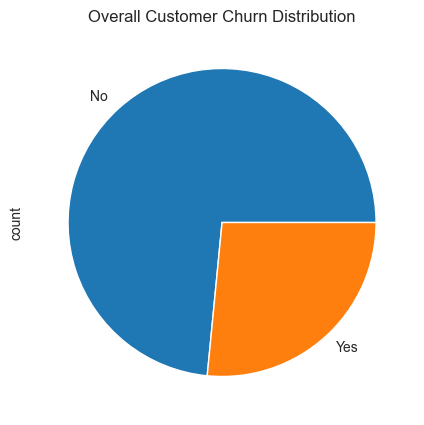

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
print(df['Churn'].value_counts().plot.pie())
plt.title('Overall Customer Churn Distribution')


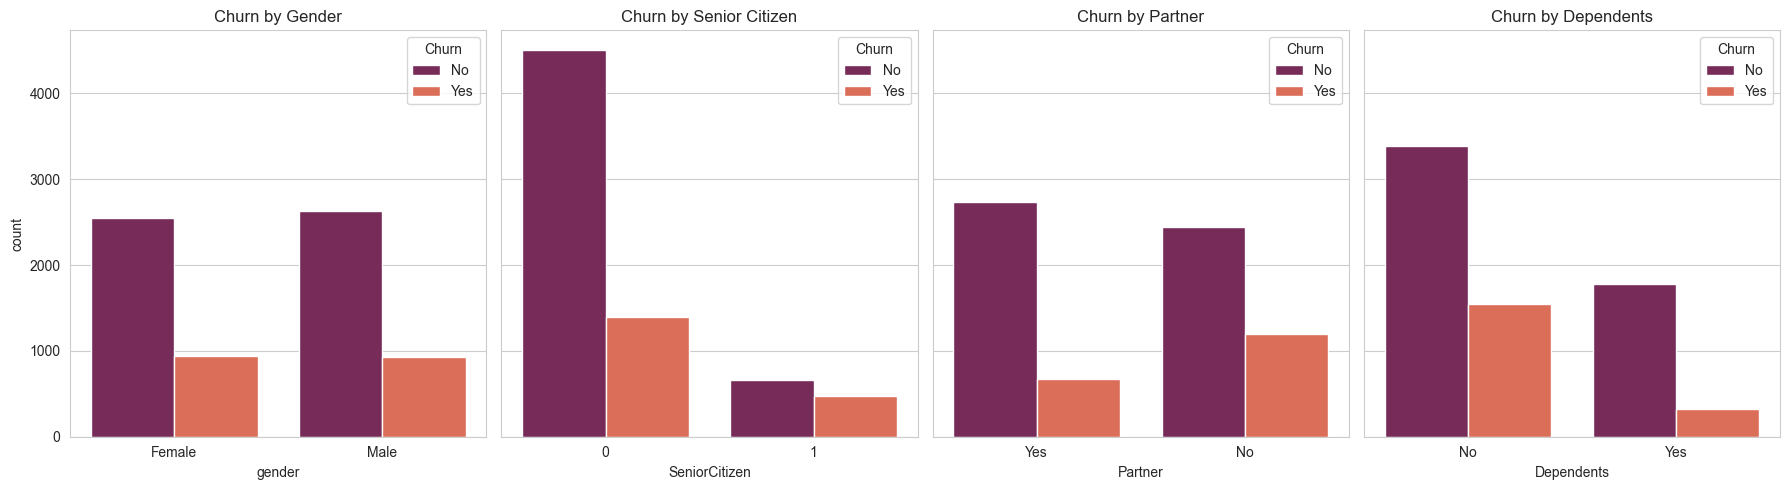

In [27]:
fig, axes = plt.subplots(1,4, figsize=(18,5), sharey=True)

sns.countplot(x='gender', hue='Churn', data=df, palette ='rocket', ax=axes[0])
axes[0].set_title('Churn by Gender')

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette = 'rocket', ax=axes[1])
axes[1].set_title('Churn by Senior Citizen')

sns.countplot(x='Partner', hue='Churn', data=df, palette='rocket', ax=axes[2])
axes[2].set_title('Churn by Partner')

sns.countplot(x='Dependents', hue='Churn', data=df, palette='coolwarm', ax=axes[3])
axes[3].set_title('Churn by Dependents')

plt.tight_layout()
plt.show()

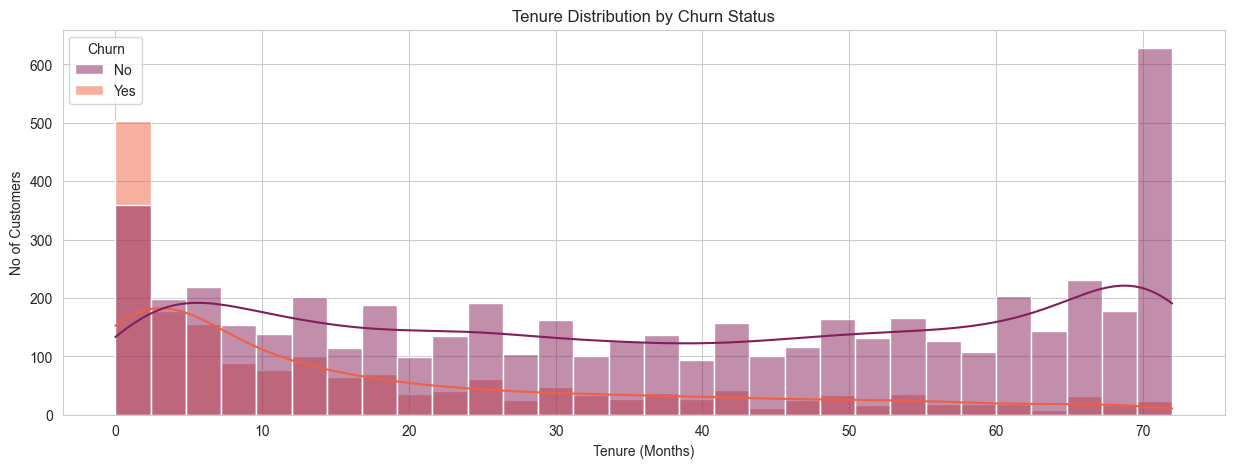

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='rocket')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('No of Customers')
plt.show()

In [12]:
tenure_order = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months', '> 72 months']
df['tenure_bins'].value_counts()

tenure_bins
0-12M     2069
61-72M    1121
13-24M    1047
25-36M     876
49-60M     820
37-48M     748
73-84M     362
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_29084\1246715621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['tenure_bins'].value_counts(), y=tenure_order, palette='rocket')


<Axes: xlabel='count'>

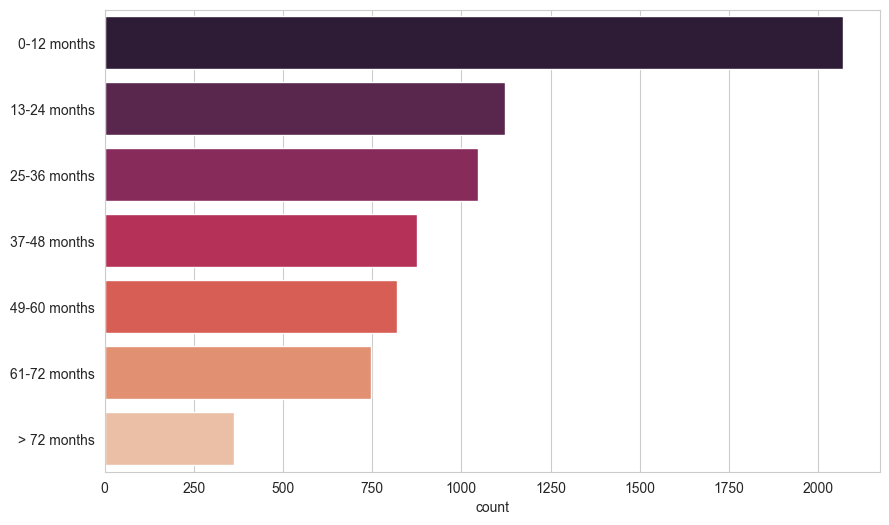

In [25]:
sns.barplot(x=df['tenure_bins'].value_counts(), y=tenure_order, palette='rocket')

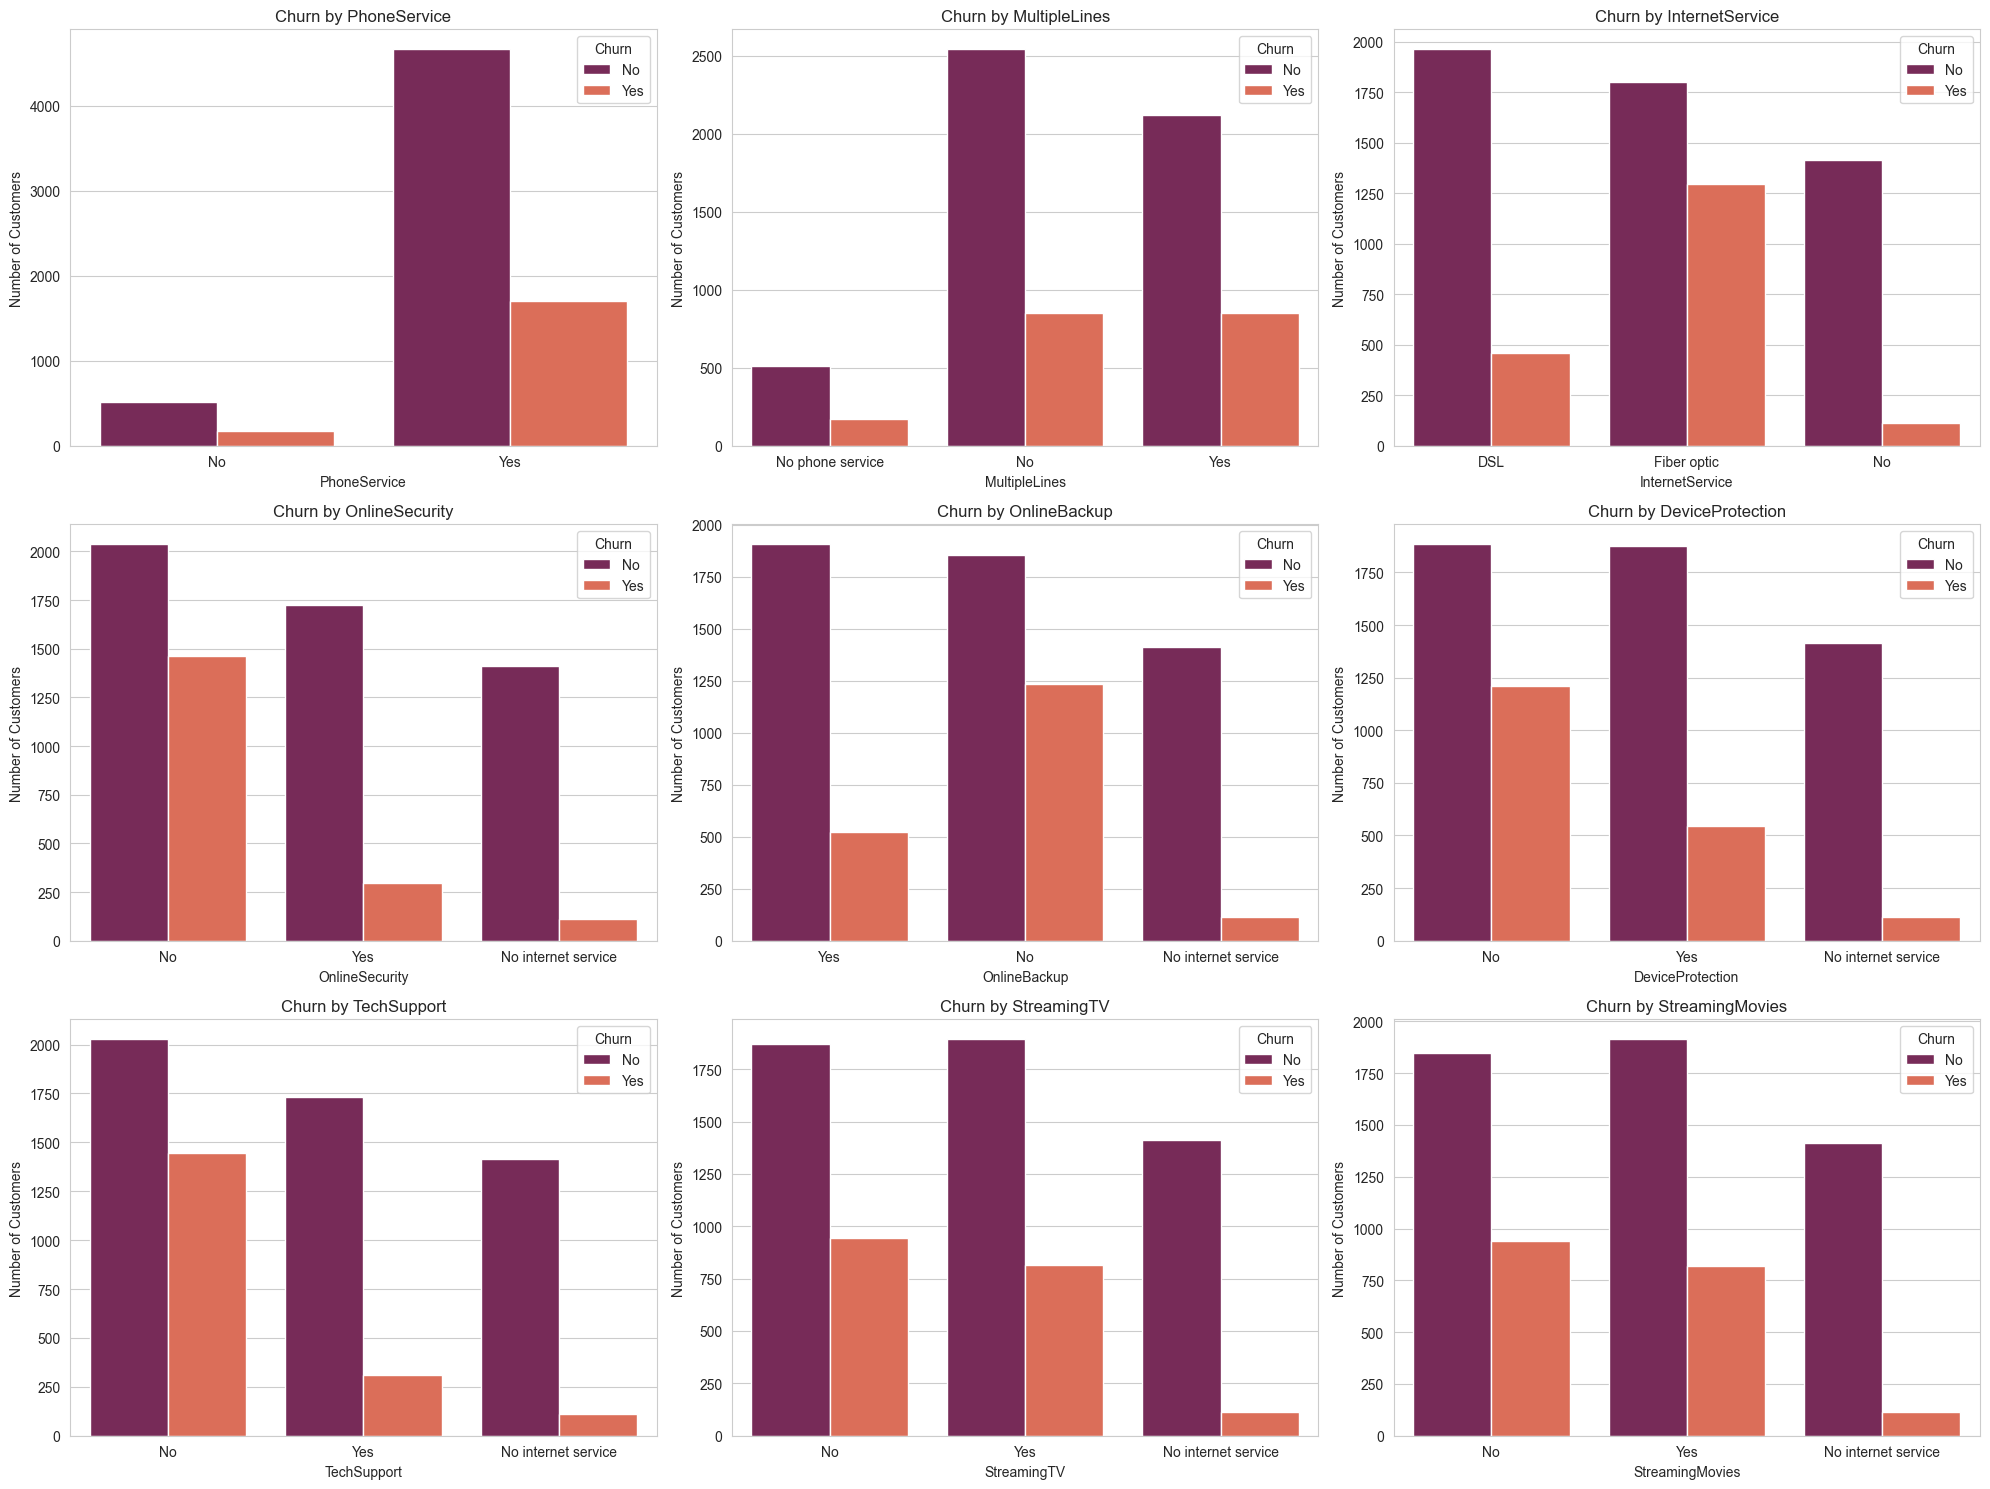

In [24]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(20, 15)) # Adjust grid size based on number of service_cols
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

for i, col in enumerate(service_cols):
    sns.countplot(x=col, hue='Churn', data=df, palette='rocket', ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

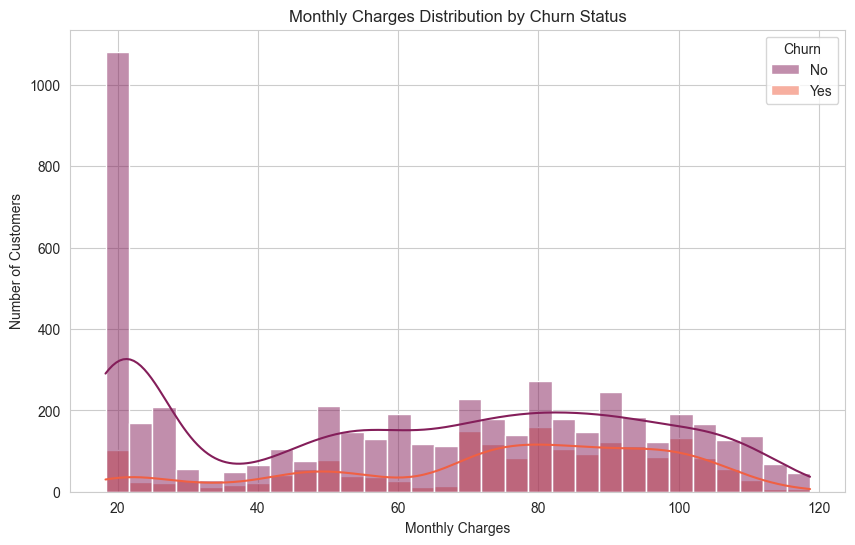

C:\Users\Admin\AppData\Local\Temp\ipykernel_29084\1162009549.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='rocket')


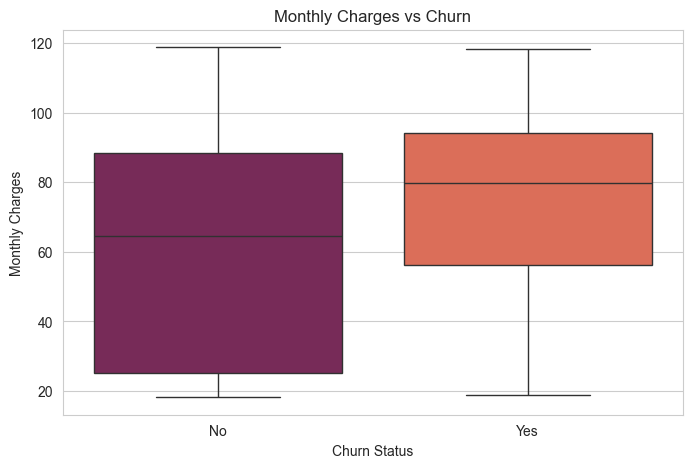

In [31]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30, palette='rocket')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='rocket')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()
